
# Project: Finding correlations between suicide rates and income per person, Human Development Index and population density in different countries in 1990 and 2015 years

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, data from a fact tank <a href=https://www.gapminder.org/data/>Gapminder</a> was used to find correlations between suicide rates and income per person, population density and Human Development Index (HDI) and its comparison between 1990 and 2015 years. 

The following data was used for the analysis:
<li>Suicide, total deaths - total number of estimated deaths from self-inflicted injury</li>
<li>Population, total - total number of population</li>
<li>Population density (per sq. km) - average number of people on each square km of the land in the given country</li>
<li>Income per person (GDP/capita, PPP$ inflation-adjusted - gross domestic product per person adjusted for differences in purchasing power (in international dollars, fixed 2011 prices, PPP based on 2011 ICP)</li>
<li>Human Development Index (HDI) - an index to rank countries by level of "human development". It contains three dimensions: health level, educational level and living standard.</li>

### Documentation for the used data

Gapminder combines data from multiple sources into unique coherent time-series that cannot be found elsewhere. More detailed information on the <a href=https://www.gapminder.org/data/documentation/>documentation</a> can be found on the Gapminder website. It should be noted, that Gapminder modified <a href=https://www.gapminder.org/data/documentation/gd003/>population</a> data, which was used in the analysis.


### Research questions

Q1: Did the percentage of suicides increase/decrease in 2015 compared to 1990 year?  Which countries have the highest and the lowest rates of suicide deaths? Did the countries with the highest and the lowest suicide rates change in 2015?

Q2: Are people in countries with high income and high HDI less tend to commit suicide? Is there any change between 1990 and 2015 years?

Q3: Is there any correlation between densily populated countries and suicide rates? Did the pattern of suicides change in 2015 compared to 1990 year?

In [1]:
# Importing necessary packages for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section, suicide, population, population density, income per person and HDI data is loaded, explored and cleaned for further analysis.

### General Properties

In [2]:
# Loading data of suicides
df_suicides = pd.read_csv('Data/suicide_total_deaths.csv')
df_suicides.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,703.00,754.00,820.00,894.00,977.00,1050.00,1100.00,1130.00,1170.00,...,1680.00,1710.00,1750.00,1760.00,1810.00,1870.00,1990.00,2080.00,2170.00,2250.00
1,Albania,127.00,130.00,131.00,135.00,136.00,142.00,150.00,162.00,170.00,...,204.00,205.00,201.00,195.00,191.00,188.00,186.00,184.00,183.00,181.00
2,Algeria,806.00,822.00,843.00,866.00,888.00,912.00,941.00,983.00,1020.00,...,1240.00,1250.00,1270.00,1290.00,1310.00,1340.00,1370.00,1410.00,1420.00,1440.00
3,Andorra,5.45,5.82,6.18,6.33,6.36,6.17,6.04,6.28,6.24,...,7.39,7.53,7.67,7.76,7.85,7.92,7.97,7.72,7.78,7.84
4,Angola,645.00,653.00,667.00,700.00,735.00,756.00,738.00,738.00,816.00,...,1040.00,1060.00,1080.00,1100.00,1120.00,1140.00,1170.00,1200.00,1220.00,1230.00


In [3]:
# Getting information of the suicide data
df_suicides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 28 columns):
country    187 non-null object
1990       187 non-null float64
1991       187 non-null float64
1992       187 non-null float64
1993       187 non-null float64
1994       187 non-null float64
1995       187 non-null float64
1996       187 non-null float64
1997       187 non-null float64
1998       187 non-null float64
1999       187 non-null float64
2000       187 non-null float64
2001       187 non-null float64
2002       187 non-null float64
2003       187 non-null float64
2004       187 non-null float64
2005       187 non-null float64
2006       187 non-null float64
2007       187 non-null float64
2008       187 non-null float64
2009       187 non-null float64
2010       187 non-null float64
2011       187 non-null float64
2012       187 non-null float64
2013       187 non-null float64
2014       187 non-null float64
2015       187 non-null float64
2016       187 non-null float64


In [4]:
# Looking for duplicates in the dataset
sum(df_suicides.duplicated())

0

In [5]:
# Looking for NULL values in the dataset
df_suicides.isnull().sum().sum()

0

In [6]:
# Getting statistical data of suicides
df_suicides.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,...,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,4074.538503,4169.940802,4279.694866,4417.736257,4542.970160,4585.298556,4564.679091,4552.603369,4545.235615,4558.306578,...,4433.014278,4397.217754,4352.416150,4327.259679,4305.187380,4293.176364,4284.953583,4303.230160,4323.959412,4344.799572
std,21423.074074,21940.033645,22361.992524,22817.941485,23277.234888,23262.770998,23026.742231,22856.921623,22568.513031,22238.748352,...,20713.369677,20389.090124,20125.965177,19965.696267,19957.130307,19948.307671,19896.778572,20015.263132,20026.707553,19977.059414
min,1.270000,1.300000,1.320000,1.340000,1.360000,1.410000,1.440000,1.490000,1.610000,1.640000,...,1.930000,1.980000,2.020000,2.070000,2.120000,2.040000,2.030000,2.100000,2.110000,2.130000
25%,119.000000,122.500000,125.000000,127.000000,130.000000,133.500000,144.500000,146.500000,145.500000,144.500000,...,173.000000,176.500000,177.500000,178.000000,180.500000,185.000000,185.000000,184.000000,183.500000,183.000000
50%,471.000000,493.000000,507.000000,539.000000,545.000000,572.000000,549.000000,573.000000,577.000000,580.000000,...,615.000000,616.000000,615.000000,615.000000,623.000000,630.000000,645.000000,648.000000,651.000000,671.000000
75%,1820.000000,1900.000000,1900.000000,1875.000000,1910.000000,1905.000000,1900.000000,1910.000000,1940.000000,1995.000000,...,1980.000000,2030.000000,2055.000000,2060.000000,2060.000000,2080.000000,2095.000000,2135.000000,2200.000000,2250.000000
max,237000.000000,242000.000000,245000.000000,247000.000000,249000.000000,246000.000000,241000.000000,236000.000000,229000.000000,218000.000000,...,217000.000000,216000.000000,216000.000000,217000.000000,222000.000000,226000.000000,227000.000000,230000.000000,231000.000000,230000.000000


In [7]:
# Loading population data
df_population = pd.read_csv('Data/population_total.csv')
df_population.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,71900000,71800000,71600000,71500000,71300000,71200000,71000000,70800000,70600000,70400000
1,Albania,410000,412000,413000,414000,416000,417000,418000,420000,421000,...,1820000,1800000,1780000,1760000,1740000,1720000,1710000,1690000,1670000,1660000
2,Algeria,2500000,2510000,2520000,2530000,2540000,2550000,2560000,2570000,2580000,...,62800000,62800000,62800000,62800000,62800000,62800000,62700000,62700000,62600000,62600000
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,64300,64200,64100,63900,63800,63700,63500,63400,63300,63100
4,Angola,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,...,156000000,158000000,160000000,162000000,164000000,166000000,167000000,169000000,171000000,173000000


In [8]:
# Getting information of the population data
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 302 entries, country to 2100
dtypes: int64(301), object(1)
memory usage: 460.2+ KB


In [9]:
# Looking for duplicates in the dataset
sum(df_population.duplicated())

0

In [10]:
# Looking for NULL values in the dataset
df_population.isnull().sum().sum()

0

In [11]:
# Getting statistical data of population
df_population.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
count,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,...,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,4.858439e+06,4.875184e+06,4.896420e+06,4.921854e+06,4.944249e+06,4.965603e+06,4.987121e+06,5.008500e+06,5.029397e+06,5.056351e+06,...,5.659498e+07,5.662540e+07,5.675702e+07,5.679806e+07,5.692194e+07,5.694654e+07,5.700201e+07,5.707281e+07,5.713275e+07,5.719615e+07
std,2.623298e+07,2.635925e+07,2.654860e+07,2.676926e+07,2.695929e+07,2.714956e+07,2.730824e+07,2.749855e+07,2.768943e+07,2.791149e+07,...,1.564600e+08,1.558650e+08,1.561099e+08,1.555318e+08,1.557702e+08,1.551804e+08,1.549070e+08,1.548159e+08,1.545554e+08,1.544635e+08
min,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,...,8.060000e+02,8.050000e+02,8.060000e+02,8.020000e+02,8.030000e+02,8.040000e+02,8.020000e+02,7.990000e+02,8.000000e+02,7.980000e+02
25%,1.120000e+05,1.120000e+05,1.120000e+05,1.120000e+05,1.120000e+05,1.120000e+05,1.120000e+05,1.120000e+05,1.120000e+05,1.120000e+05,...,2.035000e+06,2.025000e+06,2.010000e+06,1.995000e+06,1.985000e+06,1.975000e+06,1.960000e+06,1.950000e+06,1.940000e+06,1.925000e+06
50%,7.130000e+05,7.130000e+05,7.130000e+05,7.130000e+05,7.130000e+05,7.130000e+05,7.130000e+05,7.130000e+05,7.130000e+05,7.170000e+05,...,1.260000e+07,1.260000e+07,1.250000e+07,1.240000e+07,1.240000e+07,1.230000e+07,1.230000e+07,1.220000e+07,1.210000e+07,1.210000e+07
75%,2.120000e+06,2.120000e+06,2.120000e+06,2.120000e+06,2.120000e+06,2.120000e+06,2.120000e+06,2.120000e+06,2.120000e+06,2.120000e+06,...,4.915000e+07,4.915000e+07,4.900000e+07,4.880000e+07,4.860000e+07,4.840000e+07,4.825000e+07,4.805000e+07,4.795000e+07,4.805000e+07
max,3.220000e+08,3.240000e+08,3.270000e+08,3.300000e+08,3.330000e+08,3.360000e+08,3.380000e+08,3.410000e+08,3.440000e+08,3.470000e+08,...,1.570000e+09,1.560000e+09,1.560000e+09,1.550000e+09,1.550000e+09,1.540000e+09,1.530000e+09,1.530000e+09,1.520000e+09,1.520000e+09


In [12]:
# Loading population density data
df_population_dens = pd.read_csv('Data/population_density.csv')
df_population_dens.head()

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,11.90,12.00,12.20,12.30,12.50,12.70,12.90,13.10,13.30,...,110.0,110.0,110.0,109.0,109.0,109.0,109.0,108.0,108.0,108.0
1,Albania,46.10,47.00,48.00,49.20,50.50,51.80,53.30,54.70,56.30,...,66.3,65.6,64.9,64.2,63.6,62.9,62.3,61.7,61.1,60.5
2,Algeria,3.73,3.80,3.87,3.95,4.03,4.13,4.23,4.33,4.44,...,26.4,26.4,26.4,26.4,26.4,26.4,26.3,26.3,26.3,26.3
3,Andorra,13.20,14.20,15.40,16.70,18.10,19.60,21.30,22.90,24.70,...,137.0,137.0,136.0,136.0,136.0,135.0,135.0,135.0,135.0,134.0
4,Angola,3.65,3.74,3.83,3.92,4.01,4.10,4.19,4.27,4.36,...,125.0,127.0,128.0,130.0,131.0,133.0,134.0,136.0,137.0,139.0


In [13]:
# Getting information of the population density dataset
df_population_dens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 152 entries, country to 2100
dtypes: float64(151), object(1)
memory usage: 231.7+ KB


In [14]:
# Looking for duplicates in the dataset
sum(df_population_dens.duplicated())

0

In [15]:
# Looking for NULL values in the dataset
df_population_dens.isnull().sum().sum()

0

In [16]:
# Getting statistical data of population density
df_population_dens.describe()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,143.611697,142.462267,142.640882,144.024097,146.077179,149.245215,152.310990,156.464559,160.047015,163.183415,...,483.038769,483.607436,484.564410,485.497077,486.435487,486.927077,487.930000,488.760051,489.130615,490.027795
std,974.815958,946.797482,933.258752,934.026160,941.992930,964.044928,985.894712,1021.827737,1050.623775,1072.468946,...,2843.051075,2849.496701,2862.878473,2876.213955,2889.636444,2896.108338,2909.639164,2923.080055,2929.523922,2942.967289
min,0.502000,0.511000,0.520000,0.530000,0.540000,0.550000,0.561000,0.573000,0.586000,0.600000,...,2.910000,2.910000,2.920000,2.920000,2.920000,2.920000,2.920000,2.920000,2.920000,2.920000
25%,7.970000,8.110000,8.235000,8.370000,8.520000,8.690000,8.930000,9.085000,9.430000,9.680000,...,48.300000,48.250000,48.200000,48.150000,48.150000,48.200000,48.400000,48.600000,48.750000,48.800000
50%,25.700000,26.200000,26.500000,26.800000,27.100000,27.300000,27.600000,27.900000,28.200000,28.700000,...,119.000000,119.000000,118.000000,119.000000,120.000000,121.000000,122.000000,124.000000,125.000000,126.000000
75%,74.800000,75.200000,76.050000,77.100000,78.250000,79.750000,82.600000,84.400000,85.050000,85.550000,...,271.000000,271.000000,270.500000,269.000000,268.000000,267.000000,266.000000,265.000000,264.000000,263.000000
max,13400.000000,13000.000000,12800.000000,12800.000000,12900.000000,13200.000000,13500.000000,14000.000000,14400.000000,14700.000000,...,38800.000000,38900.000000,39100.000000,39300.000000,39500.000000,39600.000000,39800.000000,40000.000000,40100.000000,40300.000000


In [17]:
# Loading income per person data
df_income = pd.read_csv('Data/income_per_person.csv')
df_income.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2420,2470,2520,2580,2640,2700,2760,2820,2880,2940
1,Albania,667,667,667,667,667,668,668,668,668,...,18500,18900,19300,19700,20200,20600,21100,21500,22000,22500
2,Algeria,715,716,717,718,719,720,721,722,723,...,15600,15900,16300,16700,17000,17400,17800,18200,18600,19000
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73200,74800,76400,78100,79900,81600,83400,85300,87200,89100
4,Angola,618,620,623,626,628,631,634,637,640,...,6270,6410,6550,6700,6850,7000,7150,7310,7470,7640


In [18]:
# Getting information on the income dataset
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Columns: 242 entries, country to 2040
dtypes: int64(241), object(1)
memory usage: 365.0+ KB


In [19]:
# Funding total number of duplicated values
sum(df_income.duplicated())

0

In [20]:
# Looking for NULL values in the dataset
df_income.isnull().sum().sum()

0

In [21]:
# Getting statistical data of the income dataset
df_income.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,...,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.00000,193.000000,193.000000,193.000000
mean,947.782383,948.269430,951.217617,950.911917,952.772021,953.202073,954.305699,953.979275,950.911917,952.202073,...,23851.284974,24367.823834,24912.518135,25465.181347,26028.062176,26607.435233,27199.07772,27804.968912,28415.119171,29039.730570
std,508.348372,506.753967,516.692581,511.552526,518.974690,513.492023,514.667191,508.132446,490.318368,492.600302,...,24946.900512,25460.500225,26036.659984,26630.953200,27203.647785,27809.921089,28446.04490,29092.365685,29694.419993,30348.528109
min,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,...,718.000000,734.000000,750.000000,767.000000,784.000000,801.000000,819.00000,837.000000,856.000000,875.000000
25%,608.000000,608.000000,608.000000,609.000000,609.000000,609.000000,610.000000,610.000000,610.000000,611.000000,...,4840.000000,4950.000000,5060.000000,5170.000000,5290.000000,5400.000000,5520.00000,5650.000000,5770.000000,5900.000000
50%,847.000000,847.000000,847.000000,847.000000,848.000000,848.000000,849.000000,850.000000,850.000000,851.000000,...,15600.000000,15900.000000,16300.000000,16700.000000,17000.000000,17400.000000,17800.00000,18200.000000,18600.000000,19000.000000
75%,1100.000000,1100.000000,1110.000000,1110.000000,1110.000000,1120.000000,1120.000000,1130.000000,1130.000000,1140.000000,...,35900.000000,36700.000000,37500.000000,38400.000000,39200.000000,40100.000000,41000.00000,41900.000000,42800.000000,43800.000000
max,4230.000000,4160.000000,4390.000000,4300.000000,4500.000000,4240.000000,4270.000000,3910.000000,3480.000000,3430.000000,...,150000.000000,153000.000000,156000.000000,160000.000000,163000.000000,167000.000000,171000.00000,175000.000000,178000.000000,182000.000000


In [22]:
# Loading HDI data
df_hdi = pd.read_csv('Data/hdi.csv')
df_hdi.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.295,0.300,0.309,0.305,0.300,0.324,0.328,0.332,0.335,...,0.415,0.433,0.434,0.448,0.454,0.463,0.470,0.476,0.479,0.479
1,Albania,0.635,0.618,0.603,0.608,0.616,0.628,0.637,0.636,0.646,...,0.703,0.713,0.721,0.725,0.738,0.752,0.759,0.761,0.762,0.764
2,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.609,0.617,0.627,...,0.690,0.697,0.705,0.714,0.724,0.732,0.737,0.741,0.743,0.745
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.819,0.819,0.843,0.850,0.857,0.858
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.454,0.468,0.480,0.488,0.495,0.508,0.523,0.527,0.531,0.533


In [23]:
# Getting information on the HDI dataset
df_hdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 27 columns):
country    187 non-null object
1990       143 non-null float64
1991       143 non-null float64
1992       143 non-null float64
1993       143 non-null float64
1994       143 non-null float64
1995       147 non-null float64
1996       147 non-null float64
1997       147 non-null float64
1998       147 non-null float64
1999       150 non-null float64
2000       167 non-null float64
2001       167 non-null float64
2002       167 non-null float64
2003       169 non-null float64
2004       172 non-null float64
2005       181 non-null float64
2006       181 non-null float64
2007       181 non-null float64
2008       181 non-null float64
2009       181 non-null float64
2010       187 non-null float64
2011       187 non-null float64
2012       187 non-null float64
2013       187 non-null float64
2014       187 non-null float64
2015       187 non-null float64
dtypes: float64(26), object(1)
m

In [24]:
# Counting duplicated values in the dataset
sum(df_hdi.duplicated())

0

In [25]:
# Looking for the total number of NULL values in the dataset
df_hdi.isnull().sum().sum()

540

In [26]:
# Getting statistical data on the HDI data
df_hdi.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,143.000000,143.000000,143.000000,143.000000,143.000000,147.000000,147.000000,147.000000,147.000000,150.000000,...,181.000000,181.000000,181.000000,181.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,0.592552,0.594741,0.597070,0.601063,0.605420,0.608612,0.613946,0.619259,0.624435,0.624560,...,0.657337,0.664083,0.669862,0.673591,0.678551,0.683471,0.688460,0.692337,0.695706,0.697695
std,0.166281,0.166808,0.167563,0.168605,0.170327,0.169428,0.169412,0.169355,0.169905,0.171892,...,0.165672,0.164153,0.162393,0.159554,0.157665,0.156405,0.155093,0.155065,0.154876,0.154739
min,0.209000,0.212000,0.206000,0.203000,0.194000,0.230000,0.237000,0.240000,0.249000,0.253000,...,0.293000,0.298000,0.307000,0.312000,0.323000,0.331000,0.341000,0.345000,0.347000,0.352000
25%,0.475000,0.477500,0.477000,0.476500,0.480000,0.478000,0.476500,0.477500,0.482000,0.464250,...,0.509000,0.518000,0.523000,0.535000,0.544000,0.554000,0.564000,0.570000,0.570000,0.576500
50%,0.620000,0.626000,0.622000,0.628000,0.632000,0.634000,0.642000,0.647000,0.650000,0.650500,...,0.696000,0.699000,0.704000,0.707000,0.711000,0.714000,0.720000,0.723000,0.724000,0.727000
75%,0.722000,0.725000,0.719000,0.724000,0.732500,0.739500,0.745500,0.751500,0.760000,0.763250,...,0.787000,0.787000,0.791000,0.797000,0.797500,0.797000,0.799000,0.803000,0.804500,0.805500
max,0.866000,0.867000,0.871000,0.874000,0.884000,0.885000,0.888000,0.895000,0.906000,0.911000,...,0.934000,0.936000,0.936000,0.936000,0.939000,0.941000,0.942000,0.945000,0.948000,0.949000


<a id='cleaning'></a>
### Data Cleaning

After exploring properties of the datasets, it was found that there is no duplicated value in each dataset. However, HDI dataset contains 540 NULL values, which will be deleted further to rely only on the measured data. Then, data for 1990 and 2015 years will be selected to perform merging of the datasets into one table to perform further analysis. Also, percentage of suicides out of the total population will be calculated and added to a clean dataframe to answer the research questions.


### Deleting NULL values
HDI dataset contains 540 NULL values. In order to perform further analysis and rely on the measured data only, it was decided to delete NULL values and work with the remaining data.

In [27]:
# Deleting rows with NULL values in the HDI dataset
df_hdi = df_hdi.dropna(how='any',axis=0) 

In [28]:
# Checking NULL values in the HDI dataset
df_hdi.isnull().sum().sum()

0

In [29]:
# Getting information on the updated HDI dataset
df_hdi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 186
Data columns (total 27 columns):
country    143 non-null object
1990       143 non-null float64
1991       143 non-null float64
1992       143 non-null float64
1993       143 non-null float64
1994       143 non-null float64
1995       143 non-null float64
1996       143 non-null float64
1997       143 non-null float64
1998       143 non-null float64
1999       143 non-null float64
2000       143 non-null float64
2001       143 non-null float64
2002       143 non-null float64
2003       143 non-null float64
2004       143 non-null float64
2005       143 non-null float64
2006       143 non-null float64
2007       143 non-null float64
2008       143 non-null float64
2009       143 non-null float64
2010       143 non-null float64
2011       143 non-null float64
2012       143 non-null float64
2013       143 non-null float64
2014       143 non-null float64
2015       143 non-null float64
dtypes: float64(26), object(1)
m

In [30]:
# Checking data type of country data
type(df_hdi['country'][0])

str

Now HDI dataset contains only non-NULL float and string values. The data cleaning has reduced the number of countries in HDI dataset from 187 to 143.

### Merging tables
First, two separate tables are generated containing suicides, population, population density, income and HDI data for 1990 and 2015 years. Then, the percentage of suicides out of the total population is calculated for each table. Next, the two tables are merged to perform data anaylsis and compare the data of 1990 with 2015 year.

In [31]:
# Creating a separate dataframe for 1990 year's data
df_1990 = df_hdi.filter(['country'], axis=1)
df_1990.head()

,country
0,Afghanistan
1,Albania
2,Algeria
6,Argentina
7,Armenia


In [32]:
# Adding a column with the year
df_1990['year']=1990
df_1990.head()

,country,year
0,Afghanistan,1990
1,Albania,1990
2,Algeria,1990
6,Argentina,1990
7,Armenia,1990


In [33]:
# Adding suicides data to the 1990 year's dataframe
df_1990_suicides = df_suicides.filter(['country', '1990'], axis=1)
df_1990_suicides.rename(columns={'1990': 'suicides'}, inplace=True)
df_1990 = df_1990.merge(df_1990_suicides, left_on='country', right_on='country', how='left')
df_1990.head()

,country,year,suicides
0,Afghanistan,1990,703.0
1,Albania,1990,127.0
2,Algeria,1990,806.0
3,Argentina,1990,3300.0
4,Armenia,1990,134.0


In [34]:
# Adding population data
df_1990_population = df_population.filter(['country', '1990'], axis=1)
df_1990_population.rename(columns={'1990': 'population'}, inplace=True)
df_1990 = df_1990.merge(df_1990_population, left_on='country', right_on='country', how='left')
df_1990.head()

,country,year,suicides,population
0,Afghanistan,1990,703.0,12200000
1,Albania,1990,127.0,3280000
2,Algeria,1990,806.0,25900000
3,Argentina,1990,3300.0,32700000
4,Armenia,1990,134.0,3540000


In [35]:
# Adding population density data
df_1990_population_dens = df_population_dens.filter(['country', '1990'], axis=1)
df_1990_population_dens.rename(columns={'1990': 'population_density'}, inplace=True)
df_1990 = df_1990.merge(df_1990_population_dens, left_on='country', right_on='country', how='left')
df_1990.head()

,country,year,suicides,population,population_density
0,Afghanistan,1990,703.0,12200000,18.8
1,Albania,1990,127.0,3280000,120.0
2,Algeria,1990,806.0,25900000,10.9
3,Argentina,1990,3300.0,32700000,12.0
4,Armenia,1990,134.0,3540000,124.0


In [36]:
# Addding income per person data
df_1990_income = df_income.filter(['country', '1990'], axis=1)
df_1990_income.rename(columns={'1990': 'income'}, inplace=True)
df_1990 = df_1990.merge(df_1990_income, left_on='country', right_on='country', how='left')
df_1990.head()

,country,year,suicides,population,population_density,income
0,Afghanistan,1990,703.0,12200000,18.8,1040
1,Albania,1990,127.0,3280000,120.0,4560
2,Algeria,1990,806.0,25900000,10.9,10200
3,Argentina,1990,3300.0,32700000,12.0,10800
4,Armenia,1990,134.0,3540000,124.0,3740


In [37]:
# Adding HDI data
df_1990_hdi = df_hdi.filter(['country', '1990'], axis=1)
df_1990_hdi.rename(columns={'1990': 'hdi'}, inplace=True)
df_1990 = df_1990.merge(df_1990_hdi, left_on='country', right_on='country', how='left')
df_1990.head()

,country,year,suicides,population,population_density,income,hdi
0,Afghanistan,1990,703.0,12200000,18.8,1040,0.295
1,Albania,1990,127.0,3280000,120.0,4560,0.635
2,Algeria,1990,806.0,25900000,10.9,10200,0.577
3,Argentina,1990,3300.0,32700000,12.0,10800,0.705
4,Armenia,1990,134.0,3540000,124.0,3740,0.634


In [38]:
# Exlporing 1990 year's dataset
df_1990.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 142
Data columns (total 7 columns):
country               143 non-null object
year                  143 non-null int64
suicides              143 non-null float64
population            143 non-null int64
population_density    143 non-null float64
income                143 non-null int64
hdi                   143 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 8.9+ KB


In [39]:
# Creating the same table for 2015 year's data
df_2015 = df_hdi.filter(['country'], axis=1)
df_2015['year']=2015
df_2015_suicides = df_suicides.filter(['country', '2015'], axis=1)
df_2015_suicides.rename(columns={'2015': 'suicides'}, inplace=True)
df_2015 = df_2015.merge(df_2015_suicides, left_on='country', right_on='country', how='left')
df_2015_population = df_population.filter(['country', '2015'], axis=1)
df_2015_population.rename(columns={'2015': 'population'}, inplace=True)
df_2015 = df_2015.merge(df_2015_population, left_on='country', right_on='country', how='left')
df_2015_population_dens = df_population_dens.filter(['country', '2015'], axis=1)
df_2015_population_dens.rename(columns={'2015': 'population_density'}, inplace=True)
df_2015 = df_2015.merge(df_2015_population_dens, left_on='country', right_on='country', how='left')
df_2015_income = df_income.filter(['country', '2015'], axis=1)
df_2015_income.rename(columns={'2015': 'income'}, inplace=True)
df_2015 = df_2015.merge(df_2015_income, left_on='country', right_on='country', how='left')
df_2015_hdi = df_hdi.filter(['country', '2015'], axis=1)
df_2015_hdi.rename(columns={'2015': 'hdi'}, inplace=True)
df_2015 = df_2015.merge(df_2015_hdi, left_on='country', right_on='country', how='left')
df_2015.head()

,country,year,suicides,population,population_density,income,hdi
0,Afghanistan,2015,2170.0,33700000,51.7,1750,0.479
1,Albania,2015,183.0,2920000,107.0,11000,0.764
2,Algeria,2015,1420.0,39900000,16.7,13700,0.745
3,Argentina,2015,5010.0,43400000,15.9,19100,0.827
4,Armenia,2015,257.0,2920000,102.0,8180,0.743


In [40]:
# Exlporing 2015 year's dataset
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 142
Data columns (total 7 columns):
country               143 non-null object
year                  143 non-null int64
suicides              143 non-null float64
population            143 non-null int64
population_density    143 non-null float64
income                143 non-null int64
hdi                   143 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 8.9+ KB


In [41]:
# Let us add the percentage of suicides out of the total population for 1990 year's dataset
df_1990['percentage_of_suicides'] = (df_1990['suicides']*100)/df_1990['population']
df_1990.head()

,country,year,suicides,population,population_density,income,hdi,percentage_of_suicides
0,Afghanistan,1990,703.0,12200000,18.8,1040,0.295,0.005762
1,Albania,1990,127.0,3280000,120.0,4560,0.635,0.003872
2,Algeria,1990,806.0,25900000,10.9,10200,0.577,0.003112
3,Argentina,1990,3300.0,32700000,12.0,10800,0.705,0.010092
4,Armenia,1990,134.0,3540000,124.0,3740,0.634,0.003785


In [42]:
# Exploring the obtained dataset
df_1990.describe()

,year,suicides,population,population_density,income,hdi,percentage_of_suicides
count,143.0,143.000000,1.430000e+02,143.000000,143.000000,143.000000,143.000000
mean,1990.0,5188.168112,3.501987e+07,134.901259,13356.846154,0.592552,0.011205
std,0.0,24404.040256,1.244656e+08,383.706299,16360.546117,0.166281,0.008423
min,1990.0,1.910000,9.520000e+04,1.410000,379.000000,0.209000,0.001450
25%,1990.0,223.000000,3.195000e+06,19.850000,2845.000000,0.475000,0.004802
50%,1990.0,655.000000,8.030000e+06,54.900000,7390.000000,0.620000,0.008469
75%,1990.0,2130.000000,2.095000e+07,120.500000,19400.000000,0.722000,0.015396
max,1990.0,237000.000000,1.170000e+09,4300.000000,111000.000000,0.866000,0.040577


In [43]:
# Calculating the percentage of suicides out of the total population for 2015 year's dataset
df_2015['percentage_of_suicides'] = (df_2015['suicides']*100)/df_2015['population']
df_2015.head()

,country,year,suicides,population,population_density,income,hdi,percentage_of_suicides
0,Afghanistan,2015,2170.0,33700000,51.7,1750,0.479,0.006439
1,Albania,2015,183.0,2920000,107.0,11000,0.764,0.006267
2,Algeria,2015,1420.0,39900000,16.7,13700,0.745,0.003559
3,Argentina,2015,5010.0,43400000,15.9,19100,0.827,0.011544
4,Armenia,2015,257.0,2920000,102.0,8180,0.743,0.008801


In [44]:
# Exploring the obtained dataset
df_2015.describe()

,year,suicides,population,population_density,income,hdi,percentage_of_suicides
count,143.0,143.000000,1.430000e+02,143.000000,143.000000,143.000000,143.000000
mean,2015.0,5437.866084,4.776562e+07,202.139580,19456.727273,0.712510,0.010361
std,0.0,22789.657655,1.634767e+08,690.085759,20561.300637,0.155706,0.006946
min,2015.0,3.640000,1.060000e+05,1.920000,626.000000,0.352000,0.001857
25%,2015.0,388.500000,4.395000e+06,31.500000,4300.000000,0.579000,0.005621
50%,2015.0,923.000000,1.070000e+07,83.000000,13000.000000,0.739000,0.008155
75%,2015.0,2790.000000,3.535000e+07,150.500000,27800.000000,0.846000,0.013164
max,2015.0,231000.000000,1.400000e+09,7910.000000,120000.000000,0.949000,0.037543


In [45]:
# Preparing 1990 year's dataframe for merging by dropping the year column and renaming other columns
df_1990.drop(['year'], axis=1, inplace=True)
df_1990.rename(columns={'suicides': 'suicides_90', 'population': 'population_90', 'population_density': 'population_dens_90', 'income': 'income_90', 'hdi': 'hdi_90', 'percentage_of_suicides': 'perc_of_suicides_90'}, inplace=True)
df_1990.head()

,country,suicides_90,population_90,population_dens_90,income_90,hdi_90,perc_of_suicides_90
0,Afghanistan,703.0,12200000,18.8,1040,0.295,0.005762
1,Albania,127.0,3280000,120.0,4560,0.635,0.003872
2,Algeria,806.0,25900000,10.9,10200,0.577,0.003112
3,Argentina,3300.0,32700000,12.0,10800,0.705,0.010092
4,Armenia,134.0,3540000,124.0,3740,0.634,0.003785


In [46]:
# Preparing 2015 year's dataset for merging
df_2015.drop(['year'], axis=1, inplace=True)
df_2015.rename(columns={'suicides': 'suicides_15', 'population': 'population_15', 'population_density': 'population_dens_15', 'income': 'income_15', 'hdi': 'hdi_15', 'percentage_of_suicides': 'perc_of_suicides_15'}, inplace=True)
df_2015.head()

,country,suicides_15,population_15,population_dens_15,income_15,hdi_15,perc_of_suicides_15
0,Afghanistan,2170.0,33700000,51.7,1750,0.479,0.006439
1,Albania,183.0,2920000,107.0,11000,0.764,0.006267
2,Algeria,1420.0,39900000,16.7,13700,0.745,0.003559
3,Argentina,5010.0,43400000,15.9,19100,0.827,0.011544
4,Armenia,257.0,2920000,102.0,8180,0.743,0.008801


In [47]:
# Getting the final dataframe, which will be further explored to answer the research questions
df = df_1990.merge(df_2015, left_on='country', right_on='country', how='left')
df.head()

,country,suicides_90,population_90,population_dens_90,income_90,hdi_90,perc_of_suicides_90,suicides_15,population_15,population_dens_15,income_15,hdi_15,perc_of_suicides_15
0,Afghanistan,703.0,12200000,18.8,1040,0.295,0.005762,2170.0,33700000,51.7,1750,0.479,0.006439
1,Albania,127.0,3280000,120.0,4560,0.635,0.003872,183.0,2920000,107.0,11000,0.764,0.006267
2,Algeria,806.0,25900000,10.9,10200,0.577,0.003112,1420.0,39900000,16.7,13700,0.745,0.003559
3,Argentina,3300.0,32700000,12.0,10800,0.705,0.010092,5010.0,43400000,15.9,19100,0.827,0.011544
4,Armenia,134.0,3540000,124.0,3740,0.634,0.003785,257.0,2920000,102.0,8180,0.743,0.008801


In [48]:
# Exploring the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 142
Data columns (total 13 columns):
country                143 non-null object
suicides_90            143 non-null float64
population_90          143 non-null int64
population_dens_90     143 non-null float64
income_90              143 non-null int64
hdi_90                 143 non-null float64
perc_of_suicides_90    143 non-null float64
suicides_15            143 non-null float64
population_15          143 non-null int64
population_dens_15     143 non-null float64
income_15              143 non-null int64
hdi_15                 143 non-null float64
perc_of_suicides_15    143 non-null float64
dtypes: float64(8), int64(4), object(1)
memory usage: 15.6+ KB


In [49]:
# Checking data type of country
type(df['country'][0])

str

In [50]:
# Getting statistical information for the obtained dataframe
df.describe()

,suicides_90,population_90,population_dens_90,income_90,hdi_90,perc_of_suicides_90,suicides_15,population_15,population_dens_15,income_15,hdi_15,perc_of_suicides_15
count,143.000000,1.430000e+02,143.000000,143.000000,143.000000,143.000000,143.000000,1.430000e+02,143.000000,143.000000,143.000000,143.000000
mean,5188.168112,3.501987e+07,134.901259,13356.846154,0.592552,0.011205,5437.866084,4.776562e+07,202.139580,19456.727273,0.712510,0.010361
std,24404.040256,1.244656e+08,383.706299,16360.546117,0.166281,0.008423,22789.657655,1.634767e+08,690.085759,20561.300637,0.155706,0.006946
min,1.910000,9.520000e+04,1.410000,379.000000,0.209000,0.001450,3.640000,1.060000e+05,1.920000,626.000000,0.352000,0.001857
25%,223.000000,3.195000e+06,19.850000,2845.000000,0.475000,0.004802,388.500000,4.395000e+06,31.500000,4300.000000,0.579000,0.005621
50%,655.000000,8.030000e+06,54.900000,7390.000000,0.620000,0.008469,923.000000,1.070000e+07,83.000000,13000.000000,0.739000,0.008155
75%,2130.000000,2.095000e+07,120.500000,19400.000000,0.722000,0.015396,2790.000000,3.535000e+07,150.500000,27800.000000,0.846000,0.013164
max,237000.000000,1.170000e+09,4300.000000,111000.000000,0.866000,0.040577,231000.000000,1.400000e+09,7910.000000,120000.000000,0.949000,0.037543


Overall, the combained dataframe contains all the neccessary data to answer the research questions. There are 3 data types: string, float and integer. It was decided to keep the original data types because further operations do not need any change of the data.

<a id='eda'></a>
## Exploratory Data Analysis

In this section, the research questions will be answered using descriptive statistics and visualization.

### Research Question 1: Did the percentage of suicides increase/decrease in 2015 compared to 1990 year?  Which countries have the highest and the lowest rates of suicide deaths? Did the countries with the highest and the lowest suicide rates change in 2015?

In [51]:
# Checking whether the percentage of cuicides increased/decreased in 2015 in comparison with 1990
df['change_of_perc_of_suicides'] = (df['perc_of_suicides_15']-df['perc_of_suicides_90'])
df.head()

,country,suicides_90,population_90,population_dens_90,income_90,hdi_90,perc_of_suicides_90,suicides_15,population_15,population_dens_15,income_15,hdi_15,perc_of_suicides_15,change_of_perc_of_suicides
0,Afghanistan,703.0,12200000,18.8,1040,0.295,0.005762,2170.0,33700000,51.7,1750,0.479,0.006439,0.000677
1,Albania,127.0,3280000,120.0,4560,0.635,0.003872,183.0,2920000,107.0,11000,0.764,0.006267,0.002395
2,Algeria,806.0,25900000,10.9,10200,0.577,0.003112,1420.0,39900000,16.7,13700,0.745,0.003559,0.000447
3,Argentina,3300.0,32700000,12.0,10800,0.705,0.010092,5010.0,43400000,15.9,19100,0.827,0.011544,0.001452
4,Armenia,134.0,3540000,124.0,3740,0.634,0.003785,257.0,2920000,102.0,8180,0.743,0.008801,0.005016


In [52]:
# Calculating the number of countries with decreased suicide rate 
decrease = df.change_of_perc_of_suicides[df.change_of_perc_of_suicides < 0].count()
decrease

70

In [53]:
# Calculating the number of countries with increased suicide rate 
increase = df.change_of_perc_of_suicides[df.change_of_perc_of_suicides > 0].count()
increase

73

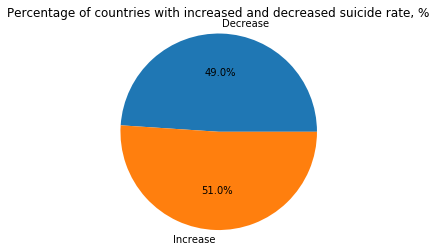

In [54]:
# Visualizing the proportions of countries with increased and decreased rates
change = [(decrease*100/143), (increase*100/143)]
change_labels = 'Decrease','Increase'
plt.pie(change,labels=change_labels,autopct='%1.1f%%')
plt.title('Percentage of countries with increased and decreased suicide rate, %')
plt.axis('equal')
plt.show()

It is clear, that the proportion between countries with increased and decreased suicide rate is almost equal in 2015 compared to 1990.

In [55]:
# Finding a country with the highest suicide rate in 1990 year
df.loc[df['perc_of_suicides_90'].idxmax()]

country                         Hungary
suicides_90                        4220
population_90                  10400000
population_dens_90                  115
income_90                         17100
hdi_90                            0.703
perc_of_suicides_90           0.0405769
suicides_15                        2400
population_15                   9780000
population_dens_15                  108
income_15                         24800
hdi_15                            0.836
perc_of_suicides_15           0.0245399
change_of_perc_of_suicides    -0.016037
Name: 53, dtype: object

In [56]:
# Finding a country with the highest suicide rate in 2015 year
df.loc[df['perc_of_suicides_15'].idxmax()]

country                        Lithuania
suicides_90                         1180
population_90                    3700000
population_dens_90                    59
income_90                          15800
hdi_90                             0.731
perc_of_suicides_90            0.0318919
suicides_15                         1100
population_15                    2930000
population_dens_15                  46.8
income_15                          27000
hdi_15                             0.848
perc_of_suicides_15            0.0375427
change_of_perc_of_suicides    0.00565077
Name: 73, dtype: object

In [57]:
# Finding a country with the lowest suicide rate in 1990 year
df.loc[df['perc_of_suicides_90'].idxmin()]

country                          Jamaica
suicides_90                         35.1
population_90                    2420000
population_dens_90                   224
income_90                           7290
hdi_90                             0.651
perc_of_suicides_90           0.00145041
suicides_15                         83.5
population_15                    2870000
population_dens_15                   265
income_15                           8110
hdi_15                              0.73
perc_of_suicides_15           0.00290941
change_of_perc_of_suicides    0.00145899
Name: 62, dtype: object

In [58]:
# Finding a country with the lowest suicide rate in 2015 year
df.loc[df['perc_of_suicides_15'].idxmin()]

country                       Sao Tome and Principe
suicides_90                                    1.91
population_90                                114000
population_dens_90                              119
income_90                                      2090
hdi_90                                        0.454
perc_of_suicides_90                      0.00167544
suicides_15                                    3.64
population_15                                196000
population_dens_15                              204
income_15                                      2940
hdi_15                                        0.574
perc_of_suicides_15                      0.00185714
change_of_perc_of_suicides              0.000181704
Name: 107, dtype: object

Countries with the highest and the lowest suicide rate were changed in 2015 compared to 1990. Countries with the highest suicide rate: Hungary (1990) and Lithuania (2105). Countries with the lowest suicide rate: Jamaica (1990) and Sao Tome and Principe (2015).

### Research Question 2: Are people in countries with high income and high HDI less tend to commit suicide? Is there any change between 1990 and 2015 years?

In [59]:
# Let us categorize the countries based on the income per person. First, we need to obtain statistical data on income
df.describe()

,suicides_90,population_90,population_dens_90,income_90,hdi_90,perc_of_suicides_90,suicides_15,population_15,population_dens_15,income_15,hdi_15,perc_of_suicides_15,change_of_perc_of_suicides
count,143.000000,1.430000e+02,143.000000,143.000000,143.000000,143.000000,143.000000,1.430000e+02,143.000000,143.000000,143.000000,143.000000,143.000000
mean,5188.168112,3.501987e+07,134.901259,13356.846154,0.592552,0.011205,5437.866084,4.776562e+07,202.139580,19456.727273,0.712510,0.010361,-0.000844
std,24404.040256,1.244656e+08,383.706299,16360.546117,0.166281,0.008423,22789.657655,1.634767e+08,690.085759,20561.300637,0.155706,0.006946,0.004621
min,1.910000,9.520000e+04,1.410000,379.000000,0.209000,0.001450,3.640000,1.060000e+05,1.920000,626.000000,0.352000,0.001857,-0.016883
25%,223.000000,3.195000e+06,19.850000,2845.000000,0.475000,0.004802,388.500000,4.395000e+06,31.500000,4300.000000,0.579000,0.005621,-0.002428
50%,655.000000,8.030000e+06,54.900000,7390.000000,0.620000,0.008469,923.000000,1.070000e+07,83.000000,13000.000000,0.739000,0.008155,0.000022
75%,2130.000000,2.095000e+07,120.500000,19400.000000,0.722000,0.015396,2790.000000,3.535000e+07,150.500000,27800.000000,0.846000,0.013164,0.001234
max,237000.000000,1.170000e+09,4300.000000,111000.000000,0.866000,0.040577,231000.000000,1.400000e+09,7910.000000,120000.000000,0.949000,0.037543,0.018287


In [60]:
# Using the minimum, 25%, 50%, 75% and the maximum values, let us create bins with edges for income data in 1990 and 2015 years
bin_edges_income_90 = [379.0,2845.0,7390.0,19400.0,111000.0] 
bin_edges_income_15 = [626.0,4300.0,13000.0,27800.0,120000.0] 

In [61]:
# Labels for the four income level groups
bin_names_income = ['low','medium','moderately high','high']

In [62]:
# Labeling the countries based on the edge values
df['income_90_levels'] = pd.cut(df['income_90'], bin_edges_income_90, labels=bin_names_income)
df['income_15_levels'] = pd.cut(df['income_15'], bin_edges_income_15, labels=bin_names_income)
df.head()

,country,suicides_90,population_90,population_dens_90,income_90,hdi_90,perc_of_suicides_90,suicides_15,population_15,population_dens_15,income_15,hdi_15,perc_of_suicides_15,change_of_perc_of_suicides,income_90_levels,income_15_levels
0,Afghanistan,703.0,12200000,18.8,1040,0.295,0.005762,2170.0,33700000,51.7,1750,0.479,0.006439,0.000677,low,low
1,Albania,127.0,3280000,120.0,4560,0.635,0.003872,183.0,2920000,107.0,11000,0.764,0.006267,0.002395,medium,medium
2,Algeria,806.0,25900000,10.9,10200,0.577,0.003112,1420.0,39900000,16.7,13700,0.745,0.003559,0.000447,moderately high,moderately high
3,Argentina,3300.0,32700000,12.0,10800,0.705,0.010092,5010.0,43400000,15.9,19100,0.827,0.011544,0.001452,moderately high,moderately high
4,Armenia,134.0,3540000,124.0,3740,0.634,0.003785,257.0,2920000,102.0,8180,0.743,0.008801,0.005016,medium,medium


In [63]:
# Finding mean suicide rates for each income level and changing the indexing for 1990 year's data
income_90 = df.groupby('income_90_levels', as_index=False)['perc_of_suicides_90'].mean()
income_90.set_index('income_90_levels', drop=True, inplace=True)
income_90.head()

,perc_of_suicides_90
income_90_levels,
low,0.008040
medium,0.007903
moderately high,0.014441
high,0.014549


In [64]:
# Finding mean suicide rates for each income level and changing the indexing for 2015 year's data
income_15 = df.groupby('income_15_levels', as_index=False)['perc_of_suicides_15'].mean()
income_15.set_index('income_15_levels', drop=True, inplace=True)
income_15.head()

,perc_of_suicides_15
income_15_levels,
low,0.007065
medium,0.009382
moderately high,0.013030
high,0.011964


Text(0.5, 1.0, 'Average percentage of suicides from the total population by income levels in 1990,%')

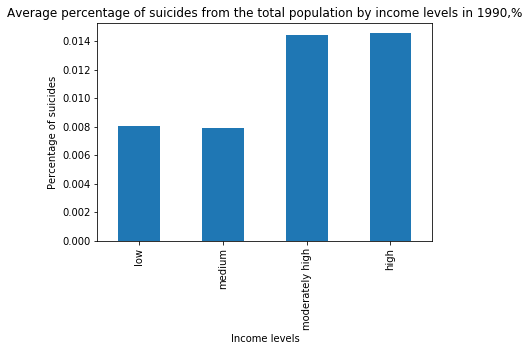

In [65]:
# Visualizing results for 1990 year's data
income_plot_90 = income_90.plot.bar(legend=False)
income_plot_90.set_xlabel('Income levels')
income_plot_90.set_ylabel('Percentage of suicides')
income_plot_90.set_title('Average percentage of suicides from the total population by income levels in 1990,%')

Text(0.5, 1.0, 'Average percentage of suicides from the total population by income levels in 2015,%')

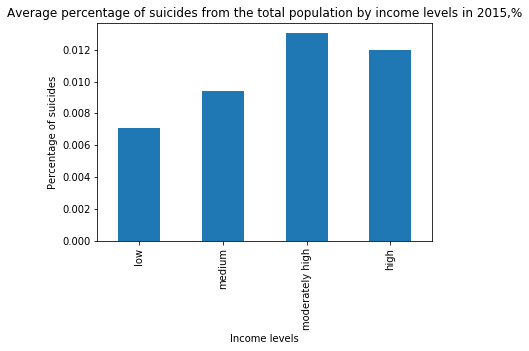

In [66]:
# Visualizing results for 2015 year's data
income_plot_15 = income_15.plot.bar(legend=False)
income_plot_15.set_xlabel('Income levels')
income_plot_15.set_ylabel('Percentage of suicides')
income_plot_15.set_title('Average percentage of suicides from the total population by income levels in 2015,%')

Based on the obtained data, countries with moderately high and high income have higher suicide rate in 1990 and 2015 years. However, countries with moderately high income has the highest rate in 2015 compared to 1990, when the maximum suicide rate was almost equal in countries with high and moderately high income.

In [67]:
# Categorizing countries based on HDI levels
bin_edges_hdi_90 = [0.209,0.475,0.620,0.722,0.866] 
bin_edges_hdi_15 = [0.352,0.579,0.739,0.846,0.949] 
bin_names_hdi = ['low','medium','moderately high','high'] 
df['hdi_90_levels'] = pd.cut(df['hdi_90'], bin_edges_hdi_90, labels=bin_names_hdi)
df['hdi_15_levels'] = pd.cut(df['hdi_15'], bin_edges_hdi_15, labels=bin_names_hdi)
df.head()

,country,suicides_90,population_90,population_dens_90,income_90,hdi_90,perc_of_suicides_90,suicides_15,population_15,population_dens_15,income_15,hdi_15,perc_of_suicides_15,change_of_perc_of_suicides,income_90_levels,income_15_levels,hdi_90_levels,hdi_15_levels
0,Afghanistan,703.0,12200000,18.8,1040,0.295,0.005762,2170.0,33700000,51.7,1750,0.479,0.006439,0.000677,low,low,low,low
1,Albania,127.0,3280000,120.0,4560,0.635,0.003872,183.0,2920000,107.0,11000,0.764,0.006267,0.002395,medium,medium,moderately high,moderately high
2,Algeria,806.0,25900000,10.9,10200,0.577,0.003112,1420.0,39900000,16.7,13700,0.745,0.003559,0.000447,moderately high,moderately high,medium,moderately high
3,Argentina,3300.0,32700000,12.0,10800,0.705,0.010092,5010.0,43400000,15.9,19100,0.827,0.011544,0.001452,moderately high,moderately high,moderately high,moderately high
4,Armenia,134.0,3540000,124.0,3740,0.634,0.003785,257.0,2920000,102.0,8180,0.743,0.008801,0.005016,medium,medium,moderately high,moderately high


In [68]:
# Finding mean suicide rates for HDI levels and changing the indexing for 1990 year's data
hdi_90 = df.groupby('hdi_90_levels', as_index=False)['perc_of_suicides_90'].mean()
hdi_90.set_index('hdi_90_levels', drop=True, inplace=True)
hdi_90.head()

,perc_of_suicides_90
hdi_90_levels,
low,0.006679
medium,0.008184
moderately high,0.013113
high,0.016882


In [69]:
# Finding mean suicide rates for HDI levels and changing the indexing for 2015 year's data
hdi_15 = df.groupby('hdi_15_levels', as_index=False)['perc_of_suicides_15'].mean()
hdi_15.set_index('hdi_15_levels', drop=True, inplace=True)
hdi_15.head()

,perc_of_suicides_15
hdi_15_levels,
low,0.007155
medium,0.008890
moderately high,0.012034
high,0.013437


Text(0.5, 1.0, 'Average percentage of suicides from the total population by HDI levels in 1990,%')

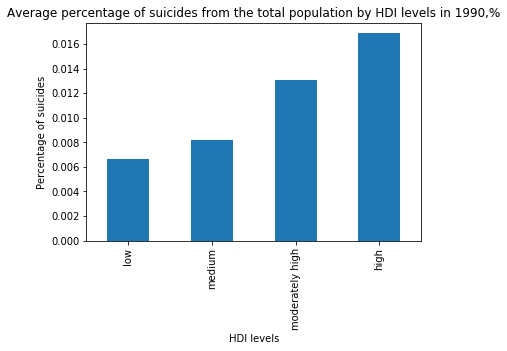

In [70]:
# Visualizing HDI results for 1990 year's data
hdi_plot_90 = hdi_90.plot.bar(legend=False)
hdi_plot_90.set_xlabel('HDI levels')
hdi_plot_90.set_ylabel('Percentage of suicides')
hdi_plot_90.set_title('Average percentage of suicides from the total population by HDI levels in 1990,%')

Text(0.5, 1.0, 'Average percentage of suicides from the total population by HDI levels in 2015,%')

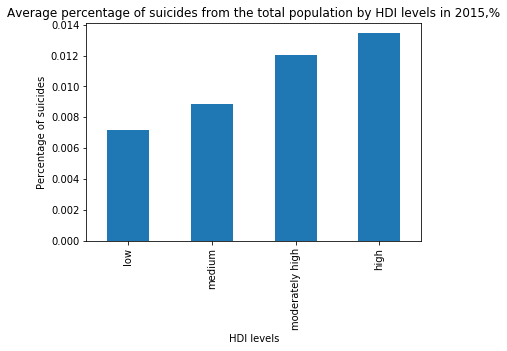

In [71]:
# Visualizing HDI results for 2015 year's data
hdi_plot_15 = hdi_15.plot.bar(legend=False)
hdi_plot_15.set_xlabel('HDI levels')
hdi_plot_15.set_ylabel('Percentage of suicides')
hdi_plot_15.set_title('Average percentage of suicides from the total population by HDI levels in 2015,%')

Overall, there is the same correlation between the percentage of suicides and HDI leveles in both years, where people with high HDI more tend to commit suicide. However, the maximum percentage of suicides was decreased in 2015 compared to 1990. 

### Research Question 3: Is there any correlation between densily populated countries and suicide rates? Did the pattern of suicides change in 2015 compared to 1990 year?

In [72]:
#Labeling countries based on the population density
bin_edges_pop_dens_90 = [1.41,19.85,54.90,120.50,4300.00] 
bin_edges_pop_dens_15 = [1.92,31.50,83.00,150.50,7910.00] 
bin_names_pop_dens = ['low','medium','moderately high','high'] 
df['population_dens_90_levels'] = pd.cut(df['population_dens_90'], bin_edges_pop_dens_90, labels=bin_names_pop_dens)
df['population_dens_15_levels'] = pd.cut(df['population_dens_15'], bin_edges_pop_dens_15, labels=bin_names_pop_dens)
df.head()

,country,suicides_90,population_90,population_dens_90,income_90,hdi_90,perc_of_suicides_90,suicides_15,population_15,population_dens_15,income_15,hdi_15,perc_of_suicides_15,change_of_perc_of_suicides,income_90_levels,income_15_levels,hdi_90_levels,hdi_15_levels,population_dens_90_levels,population_dens_15_levels
0,Afghanistan,703.0,12200000,18.8,1040,0.295,0.005762,2170.0,33700000,51.7,1750,0.479,0.006439,0.000677,low,low,low,low,low,medium
1,Albania,127.0,3280000,120.0,4560,0.635,0.003872,183.0,2920000,107.0,11000,0.764,0.006267,0.002395,medium,medium,moderately high,moderately high,moderately high,moderately high
2,Algeria,806.0,25900000,10.9,10200,0.577,0.003112,1420.0,39900000,16.7,13700,0.745,0.003559,0.000447,moderately high,moderately high,medium,moderately high,low,low
3,Argentina,3300.0,32700000,12.0,10800,0.705,0.010092,5010.0,43400000,15.9,19100,0.827,0.011544,0.001452,moderately high,moderately high,moderately high,moderately high,low,low
4,Armenia,134.0,3540000,124.0,3740,0.634,0.003785,257.0,2920000,102.0,8180,0.743,0.008801,0.005016,medium,medium,moderately high,moderately high,high,moderately high


In [73]:
# Finding mean suicide rates for population density levels and changing the indexing for 1990 year's data
pop_dens_90 = df.groupby('population_dens_90_levels', as_index=False)['perc_of_suicides_90'].mean()
pop_dens_90.set_index('population_dens_90_levels', drop=True, inplace=True)
pop_dens_90.head()

,perc_of_suicides_90
population_dens_90_levels,
low,0.010356
medium,0.008561
moderately high,0.012313
high,0.013479


In [74]:
# Finding mean suicide rates for population density levels and changing the indexing for 2015 year's data
pop_dens_15 = df.groupby('population_dens_15_levels', as_index=False)['perc_of_suicides_15'].mean()
pop_dens_15.set_index('population_dens_15_levels', drop=True, inplace=True)
pop_dens_15.head()

,perc_of_suicides_15
population_dens_15_levels,
low,0.011049
medium,0.010394
moderately high,0.010049
high,0.009679


Text(0.5, 1.0, 'Average percentage of suicides from the total population by population density levels in 1990,%')

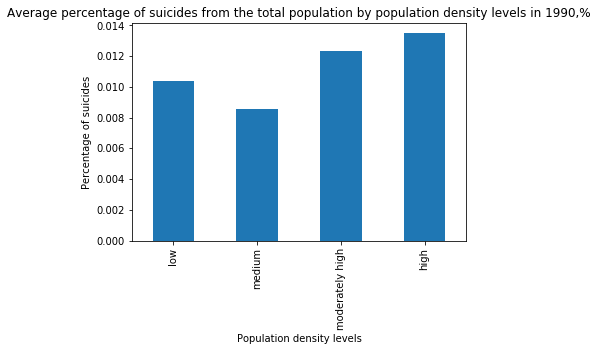

In [75]:
# Visualizing the obtained results for population density data in 1990 year
pop_plot_90 = pop_dens_90.plot.bar(legend=False)
pop_plot_90.set_xlabel('Population density levels')
pop_plot_90.set_ylabel('Percentage of suicides')
pop_plot_90.set_title('Average percentage of suicides from the total population by population density levels in 1990,%')

Text(0.5, 1.0, 'Average percentage of suicides from the total population by population density levels in 2015,%')

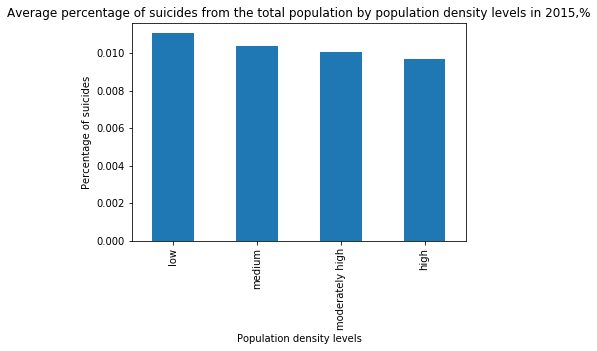

In [76]:
# Visualizing the obtained results for population density data in 2015 year
pop_plot_15 = pop_dens_15.plot.bar(legend=False)
pop_plot_15.set_xlabel('Population density levels')
pop_plot_15.set_ylabel('Percentage of suicides')
pop_plot_15.set_title('Average percentage of suicides from the total population by population density levels in 2015,%')

Comparing 1990 and 2015, there is no repeating pattern in the population data vs percentage of suicides, which may be due to absence any relationship between suicides and population density.

<a id='conclusions'></a>
## Conclusions

### Q1: Did the percentage of suicides increase/decrease in 2015 compared to 1990 year?  Which countries have the highest and the lowest rates of suicide deaths? Did the countries with the highest and the lowest suicide rates change in 2015?


<li> The percentage of suicieds out of the total population was increased in 73 countries. However, there are 70 countries where the suicide rate was decreased in 2015. Overall, a ratio between the countries with increased and decreased suicide rates is almost equal (70 to 73); </li>
<li> Countries with the highest proportion of suicides out of the total population: Hungary (1990) and Lithuania (2015); </li>
<li> Countries with the lowest proportion of suicides out of the total population: Jamaica (1990) and Sao Tome and Principe (2015). </li>

### Q2: Are people in countries with high income and high HDI less tend to commit suicide? Is there any change between 1990 and 2015 years?

<li> An interesting finding of the analysis is people in developed countries with high and moderately high income and HDI are more tend to commit suicide; </li>
<li> In 2015 countries with moderately high income had the highest suicide rate, while in 1990 countries with high income had the highest chance of suicides; </li>
<li> There is the same pattern for average percentage of suicides and HDI levels for 1990 and 2015 years. </li>


### Q3: Is there any correlation between densily populated countries and suicide rates? Did the pattern of suicides change in 2015 compared to 1990 year?

<li> It seems that there is no strong correlation between population density and average suicide rates. For example, in 1990 countries with moderately high and high population density had the highest rate of sucides. However, in 2015 the suicide rates are almost similar for each population density levels. </li>